**Elanchezhian K R**

In [2]:
# importing Libraries
import pandas as pd # mainly for working with relational or labeled data easily 
import seaborn as sns # used for Visualisation
import matplotlib.pyplot as plt # used for Visualisation

In [30]:
# Loading the dataset
df = pd.read_excel(r'/content/Data Visualization Assignmnet Original.xlsx')
df.head()

,DATE,DESCRIPTION,UNIT,PLACE
0,2022-04-01,Beef,1.0,Kolenchery
1,2022-04-01,Fish,1.0,Kolenchery
2,2022-04-03,Beef,2.0,Tripunithura
3,2022-04-05,Prawns,1.0,Bangalore
4,2022-04-06,Dates,1.0,Mangalore


In [31]:
# Finding shape of dataset
df.shape

(111, 4)

In [32]:
# Info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE         111 non-null    datetime64[ns]
 1   DESCRIPTION  111 non-null    object        
 2   UNIT         111 non-null    float64       
 3   PLACE        103 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 3.6+ KB


In [34]:
# check for null values
df.isna().sum()

DATE           0
DESCRIPTION    0
UNIT           0
PLACE          8
dtype: int64

In [35]:
# Dropping null Values
df=df.dropna()

In [36]:
# checking whether the null values are remove are not
df.isna().sum()

DATE           0
DESCRIPTION    0
UNIT           0
PLACE          0
dtype: int64

In [37]:
# checking dataset shape after droping null values
df.shape

(103, 4)

In [38]:
finding unique values in PLACE column
df['PLACE'].unique()

array(['Kolenchery ', 'Tripunithura ', 'Bangalore ', 'Mangalore',
       'Pathanamthitta ', 'Pune', 'Malappuram', 'Padappai- Tamilnadu',
       'Nettoor', 'Kottayam', 'Jabalpur - Madhyapradesh',
       'Eroor - Vytila', 'Kanjiramttom', 'Vazhakala', 'Noida - UP',
       'Mumbai', 'United States', 'Bangalore to US', 'To Kottayam',
       'Chennai', 'Kumily', 'Mangalore - Ullal', 'Tripunithura', 'Kochi',
       'Eloor', 'Tripunithurra', 'Aroor', 'Thrissur/ Guruvayoor',
       'Kakkanad', 'Bangalore', 'malappuram', 'Kadavanthra',
       'kadavanthra'], dtype=object)

In [39]:
# to get the overview of city I am grouping them by STATE by 'replace()

df['STATE'] = df['PLACE'].replace({'Kolenchery ' : 'Kerala', 'Tripunithura ': 'Kerala', 'Bangalore ' : 'Karnataka', 'Mangalore' : 'Karnataka',
'Pathanamthitta ' : 'Kerala', 'Pune' : 'Maharastra', 'Malappuram' : 'Kerala', 'Padappai- Tamilnadu' :'Tamil Nadu',
'Nettoor': 'Kerala', 'Kottayam' : 'Kerala', 'Jabalpur - Madhyapradesh' : 'Madhyapradesh',
'Eroor - Vytila' : 'Kerala', 'Kanjiramttom' : 'Kerala', 'Vazhakala' : 'Kerala', 'Noida - UP' : 'Uttar Pradesh',
'Mumbai' : 'Maharastra',  'Bangalore to US' : 'USA', 'To Kottayam' : 'Kerala',
'Chennai' : 'Tamil Nadu', 'Kumily' : 'Kerala', 'Mangalore - Ullal' : 'Karnataka', 'Tripunithura' : 'Kerala', 'Kochi' : 'Kerala',
'Eloor' : 'Kerala' , 'Tripunithurra' :'Kerala', 'Aroor' : 'Kerala', 'Thrissur/ Guruvayoor': 'Kerala',
'Kakkanad' : 'Kerala', 'Bangalore' : 'Karnataka', 'malappuram' : 'Kerala', 'Kadavanthra' : 'Kerala',
'kadavanthra': 'Kerala'})

In [64]:
# finding unique values
df['DESCRIPTION'].unique()

array(['Beef', 'Fish', 'Prawns', 'Dates', 'Mango', 'Lemon', 'Dry fruits',
       'King Fish', 'Dryfruits', 'Kadumanga'], dtype=object)

In [65]:
# grouping foods by category by .replace()
df['FOOD_CATEGORY'] = df['DESCRIPTION'].replace({'Beef': 'VEG', 'Fish' : 'NON_VEG', 'Prawns' : 'NON_VEG', 'Dates':'VEG', 'Mango':'VEG', 'Lemon': 'VEG', 'Dry fruits' : 'VEG',
'King Fish' : 'NON_VEG', 'Dryfruits' : 'VEG', 'Kadumanga':'VEG'})

In [66]:
# viewing top 5 rows 
df.head()

,DATE,DESCRIPTION,UNIT,PLACE,STATE,day,month,week_No,DAY_NAME,MONTH,FOOD_CATEGORY
0,2022-04-01,Beef,1.0,Kolenchery,Kerala,1,4,1,Friday,April,VEG
1,2022-04-01,Fish,1.0,Kolenchery,Kerala,1,4,1,Friday,April,NON_VEG
2,2022-04-03,Beef,2.0,Tripunithura,Kerala,3,4,1,Sunday,April,VEG
3,2022-04-05,Prawns,1.0,Bangalore,Karnataka,5,4,1,Tuesday,April,NON_VEG
4,2022-04-06,Dates,1.0,Mangalore,Karnataka,6,4,1,Wednesday,April,VEG


In [41]:
df['day'] = df['DATE'].apply(lambda r:r.day) # Extracting Day number from 'DATE' and creating new column
df['month'] = df['DATE'].apply(lambda r:r.month) # Extracting Month number from 'DATE' and creating new column
df['week_No'] = df['DATE'].apply(lambda d: (d.day-1) // 7 + 1) # Extracting Week  number from 'DATE' and creating new column
df['DAY_NAME'] = df['DATE'].dt.day_name() # Extracting Day name from 'DATE' and creating new column
df['MONTH'] = df['month'].replace({4:'April',5:'May',6:'June'}) # replacing month number by corresponding month name

In [89]:
df['temp'] = df['FOOD_CATEGORY'].replace({'NON_VEG': 1,'VEG':0})

In [90]:
# Viewing top 5 rows
df.head()

,DATE,DESCRIPTION,UNIT,PLACE,STATE,day,month,week_No,DAY_NAME,MONTH,FOOD_CATEGORY,temp
0,2022-04-01,Beef,1.0,Kolenchery,Kerala,1,4,1,Friday,April,VEG,0
1,2022-04-01,Fish,1.0,Kolenchery,Kerala,1,4,1,Friday,April,NON_VEG,1
2,2022-04-03,Beef,2.0,Tripunithura,Kerala,3,4,1,Sunday,April,VEG,0
3,2022-04-05,Prawns,1.0,Bangalore,Karnataka,5,4,1,Tuesday,April,NON_VEG,1
4,2022-04-06,Dates,1.0,Mangalore,Karnataka,6,4,1,Wednesday,April,VEG,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


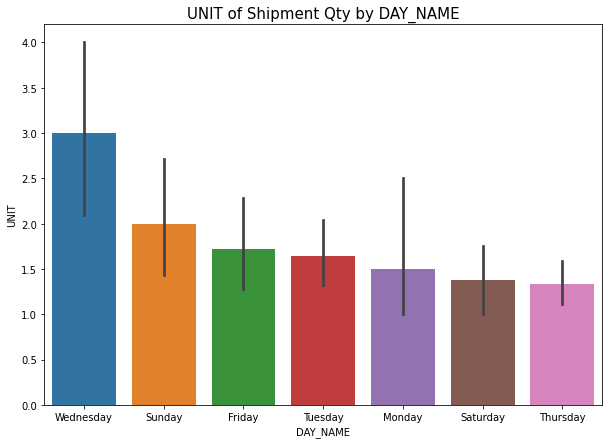

In [87]:
# Visualising UNIT of Shipment Qty by DAY_NAME

plt.figure(figsize=(10,7)) 
order = df.groupby(['DAY_NAME']).mean().sort_values('UNIT' , ascending = False).index # specifying the order
sns.barplot(df['DAY_NAME'], df['UNIT'],order=order).set_title("UNIT of Shipment Qty by DAY_NAME",fontsize=15)
plt.show()

From the above Barchart we can see that **wednesday** is having High shipment qty 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


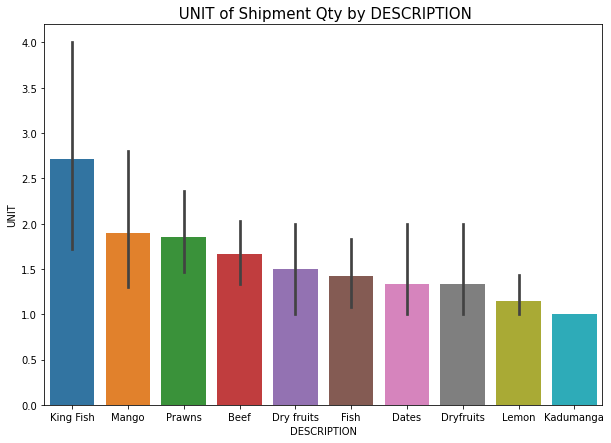

In [86]:
# Visualising UNIT of Shipment Qty by DESCRIPTION

plt.figure(figsize=(10,7))
order = df.groupby(['DESCRIPTION']).mean().sort_values('UNIT' , ascending = False).index
sns.barplot(df['DESCRIPTION'], df['UNIT'],order=order).set_title(" UNIT of Shipment Qty by DESCRIPTION",fontsize=15)
plt.show()

From the above bar chart we can see that **King Fish** is the Highest Shipped Item 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


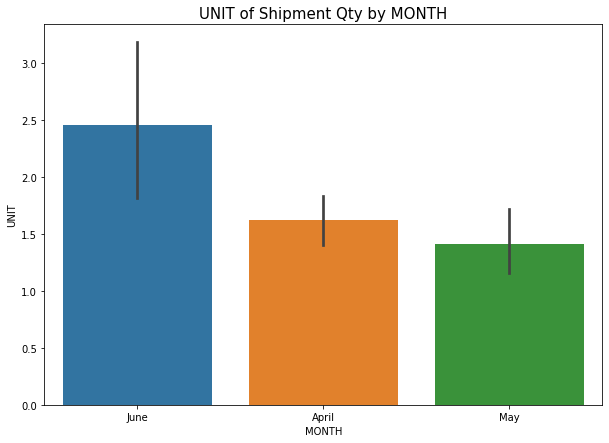

In [85]:
# Visualising UNIT of Shipment Qty by MONTH

plt.figure(figsize=(10,7))
order = df.groupby(['MONTH']).mean().sort_values('UNIT' , ascending = False).index
sns.barplot(df['MONTH'], df['UNIT'],order=order).set_title("UNIT of Shipment Qty by MONTH",fontsize=15)
plt.show()

From the above chart it is Clear that **June month** has the shipment qty is the Highest

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


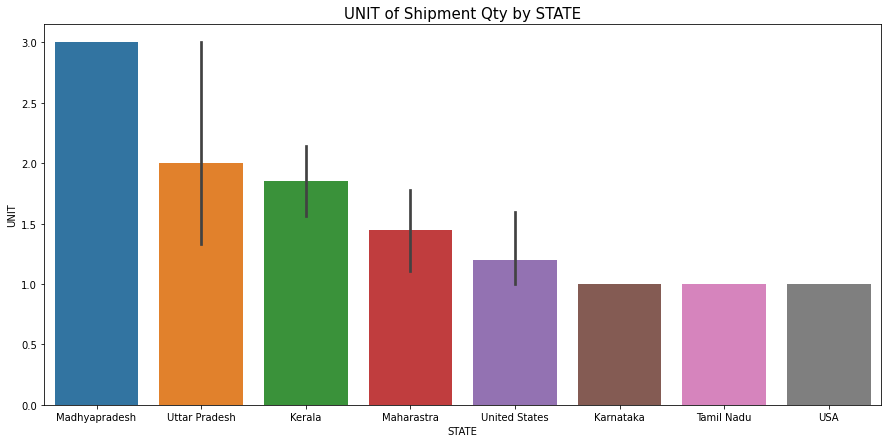

In [84]:
# Visualising UNIT of Shipment Qty by STATE

plt.figure(figsize=(15,7))
order = df.groupby(['STATE']).mean().sort_values('UNIT' , ascending = False).index
sns.barplot(df['STATE'], df['UNIT'],order=order).set_title("UNIT of Shipment Qty by STATE",fontsize=15)
plt.show()

From the above chart we can find that Cities in **Madhyapradesh** have the highest shipment

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


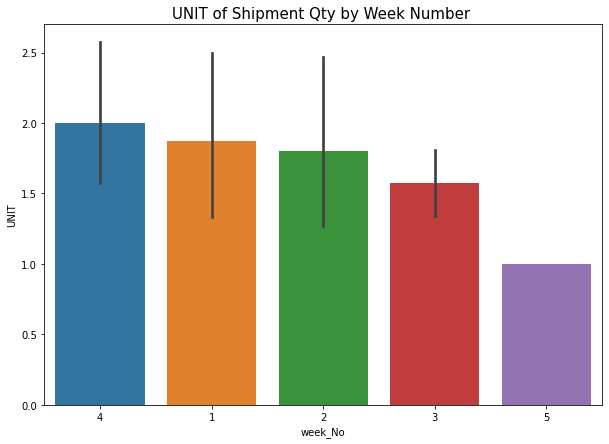

In [83]:
# Visualising UNIT of Shipment Qty by Week Number

plt.figure(figsize=(10,7))
order = df.groupby(['week_No']).mean().sort_values('UNIT' , ascending = False).index
sns.barplot(df['week_No'], df['UNIT'],order=order).set_title("UNIT of Shipment Qty by Week Number ",fontsize=15)
plt.show() 

From the above visualisation we can see that **1st and 4th week** have Highest shipment.

This may be due to 1st week of the month People have their Salary So they consume more products .

So to meet the demand of 1st week Many owners are making shipments in 4th week





/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


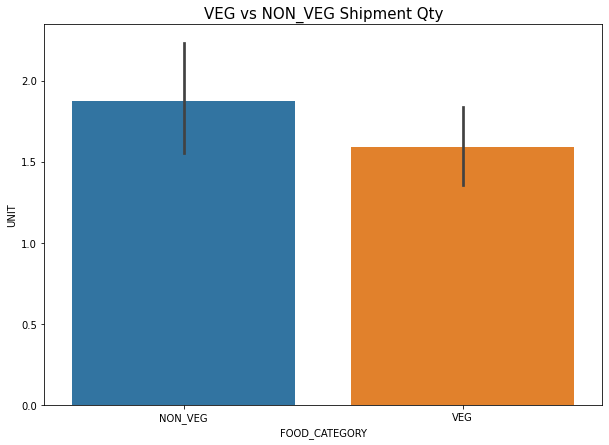

In [79]:
# Visualising VEG vs NON_VEG Shipment Qty

plt.figure(figsize=(10,7))
order = df.groupby(['FOOD_CATEGORY']).mean().sort_values('UNIT' , ascending = False).index
sns.barplot(df['FOOD_CATEGORY'], df['UNIT'],order=order).set_title("VEG vs NON_VEG Shipment Qty",fontsize=15)
plt.show()

From the above chart we can see that **Non_Veg** items are shipped most

In [92]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [94]:
df.to_csv('Processed.csv') # Downloading csv
!cp Processed.csv "drive/My Drive/"